#前言

       上一期中，我们通过折线图可以快速的发现时间序列的趋势图，当然他不仅仅只能用在时间序列中，也可以和其他图形配合使用，正如本期要介绍的，可以将折线图绘制到散点图中。散点图可以反映两个变量间的相关关系，即如果存在相关关系的话，它们之间是正向的线性关系还是反向的线性关系？甚至于是非线性关系？在绘制散点图之前，我们任然老规矩，先来介绍一下matplotlib包中的scatter函数用法及参数含义。

scatter函数的参数解读

       matplotlib模块中scatter函数语法及参数含义：

In [ ]:
plt.scatter(x, y, s=20, 
            c=None, marker='o', 
            cmap=None, norm=None, 
            vmin=None, vmax=None, 
            alpha=None, linewidths=None, 
            edgecolors=None)

In [ ]:
x：指定散点图的x轴数据；
y：指定散点图的y轴数据；
s：指定散点图点的大小，默认为20，通过传入新的变量，实现气泡图的绘制；
c：指定散点图点的颜色，默认为蓝色；
marker：指定散点图点的形状，默认为圆形；
cmap：指定色图，只有当c参数是一个浮点型的数组的时候才起作用；
norm：设置数据亮度，标准化到0~1之间，使用该参数仍需要c为浮点型的数组；
vmin、vmax：亮度设置，与norm类似，如果使用了norm则该参数无效；
alpha：设置散点的透明度；
linewidths：设置散点边界线的宽度；
edgecolors：设置散点边界线的颜色；

一般散点图的绘制

案例：汽车速度与刹车距离的关系

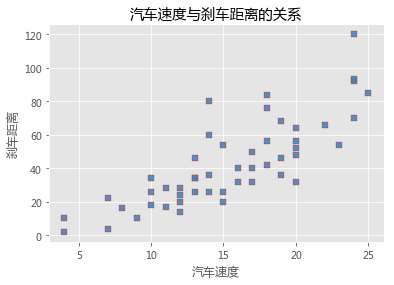

In [5]:
# 导入模块
import pandas as pd
import matplotlib.pyplot as plt

# 设置绘图风格
plt.style.use('ggplot')
# 设置中文编码和负号的正常显示
plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False

# 读入数据
cars = pd.read_csv('cars.csv')
# 绘图
plt.scatter(cars.speed, # x轴数据为汽车速度
            cars.dist, # y轴数据为汽车的刹车距离
            s = 30, # 设置点的大小 
            c = 'steelblue', # 设置点的颜色
            marker = 's', # 设置点的形状
            alpha = 0.9, # 设置点的透明度
            linewidths = 0.3, # 设置散点边界的粗细
            edgecolors = 'red' # 设置散点边界的颜色
            )

# 添加轴标签和标题
plt.title('汽车速度与刹车距离的关系')
plt.xlabel('汽车速度')
plt.ylabel('刹车距离')

# 去除图边框的顶部刻度和右边刻度
plt.tick_params(top = 'off', right = 'off')

# 显示图形
plt.show()

这样一张简单的散点图就呈现出来了，很明显的发现，汽车的刹车速度与刹车距离存在正相关关系，即随着速度的增加，刹车距离也在增加。其实这个常识不用绘图都能够发现，关键是通过这个简单的案例，让大家学会如何通过python绘制一个散点图。如果你需要画的散点图，是根据不同的类别进行绘制，如按不同的性别，将散点图区分开来等。这样的散点图该如何绘制呢？

分组散点图的绘制

案例：iris数据集

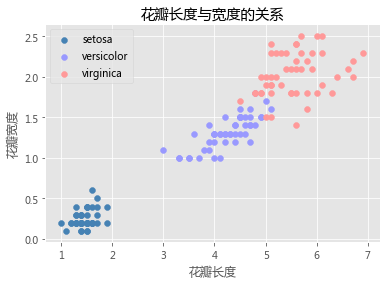

In [12]:
# 读取数据
iris = pd.read_csv('iris.csv')

# 自定义颜色
colors = ['steelblue', '#9999ff', '#ff9999']

# 三种不同的花品种
Species = iris.Species.unique()

# 通过循环的方式，完成分组散点图的绘制
for i in range(len(Species)):
    plt.scatter(iris.loc[iris.Species == Species[i], 'Petal.Length'], 
                iris.loc[iris.Species == Species[i], 'Petal.Width'], 
                s = 35, c = colors[i], label = Species[i])

# 添加轴标签和标题
plt.title('花瓣长度与宽度的关系')
plt.xlabel('花瓣长度')
plt.ylabel('花瓣宽度')

# 去除图边框的顶部刻度和右边刻度
plt.tick_params(top = 'off', right = 'off')
# 添加图例
plt.legend(loc = 'upper left')
# 显示图形
plt.show()

绘制这样的分组散点图是不是也非常的简单呀，而且关于图的属性，可以想怎么设置就怎么设置。从图中可以发现，三种花的花瓣长度与宽度之间都存在正向的关系，只不过品种setasa的体型比较小，数据点比较聚集。

气泡图的绘制

案例：大区销售数据

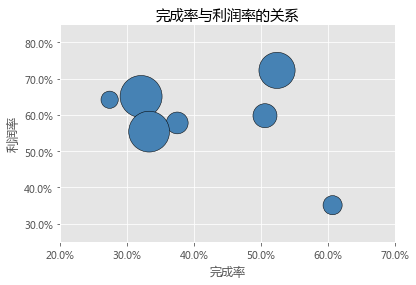

In [14]:
# 导入第三方包
import numpy as np

# 读取数据
sales = pd.read_excel('sales.xlsx')

# 绘制气泡图
plt.scatter(sales.finish_ratio, 
            sales.profit_ratio, 
            c = 'steelblue',
            s = sales.tot_target/30,
            edgecolor = 'black')

# 改变轴刻度的显示方式（百分比形式）
plt.xticks(np.arange(0,1,0.1), [str(i*100)+'%' for i in np.arange(0,1,0.1)])
plt.yticks(np.arange(0,1,0.1), [str(i*100)+'%' for i in np.arange(0,1,0.1)])

# 设置x轴和y轴的数值范围
plt.xlim(0.2, 0.7)
plt.ylim(0.25, 0.85)

# 添加轴标签和标题
plt.title('完成率与利润率的关系')
plt.xlabel('完成率')
plt.ylabel('利润率')

# 去除图边框的顶部刻度和右边刻度
plt.tick_params(top = 'off', right = 'off')
# 显示图形
plt.show()